In [15]:
from mplsoccer import Pitch, VerticalPitch
import pandas as pd
import numpy as np 
from pandas import json_normalize 
import requests 

In [2]:
events=requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3869354.json')
events=events.json()

df=json_normalize(events, sep = "_")

In [3]:
pd.set_option("display.max.columns",None)
df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,out,under_pressure,duel_type_id,duel_type_name,clearance_aerial_won,clearance_head,clearance_body_part_id,clearance_body_part_name,off_camera,counterpress,duel_outcome_id,duel_outcome_name,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,dribble_outcome_id,dribble_outcome_name,pass_switch,pass_cross,clearance_right_foot,pass_aerial_won,pass_inswinging,pass_technique_id,pass_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_goal_assist,shot_first_time,shot_aerial_won,pass_straight,ball_recovery_recovery_failure,dribble_nutmeg,clearance_left_foot,pass_cut_back,foul_won_defensive,foul_committed_card_id,foul_committed_card_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,ball_recovery_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,goalkeeper_punched_out,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain
0,f4aaba7a-6177-44f6-a0b4-aa4ecb6c6b8f,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,768,England,1,Regular Play,768,England,433.0,"[{'player': {'id': 3468, 'name': 'Jordan Pickf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55f454cb-e250-4f51-b97d-68e3a7a92289,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,768,England,1,Regular Play,771,France,4231.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3518fba5-71a8-4fb3-9ad9-b1f38065b426,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,768,England,1,Regular Play,771,France,NaN,NaN,[89051bd1-8b17-4391-9a85-31ca6ba3de37],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89051bd1-8b17-4391-9a85-31ca6ba3de37,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,768,England,1,Regular Play,768,England,NaN,NaN,[3518fba5-71a8-4fb3-9ad9-b1f38065b426],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_pass=df.loc[(df['type_name']== 'Pass') & (df['team_name']== "France")]

location_xy = df_pass.location.apply(pd.Series)

location_xy.columns=['x', 'y']

In [6]:
location_xy.dropna(inplace = True)
location_xy.head(10)

,x,y
4,61.0,40.1
7,46.1,42.3
14,99.0,80.0
56,30.3,68.4
58,23.2,70.6
62,26.4,65.9
64,20.4,41.1
67,80.4,13.4
71,95.4,18.0
73,92.2,13.6


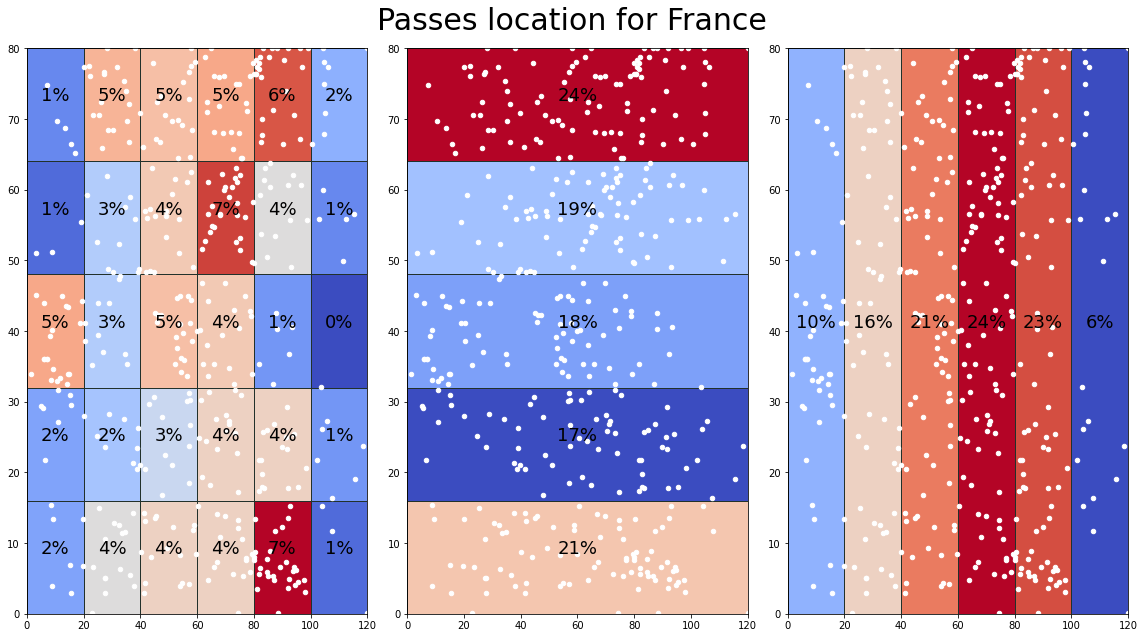

In [41]:
import matplotlib.pyplot as plt

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

bins = [(6, 5), (1, 5), (6, 1)]

for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(location_xy.x, location_xy.y, statistic='count', bins=bin)
    
    pitch.heatmap(bin_statistic, ax=ax[i], cmap='coolwarm', edgecolors='#22312b')
    pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax[i])
    
    bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                  .applymap(lambda x: '{:.0%}'.format(x))
                                  .values)
    pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax[i], ha='center', va='bottom')

fig.suptitle('Passes location for France', x=0.5, y=0.98, fontsize=30)
plt.tight_layout()
plt.show()


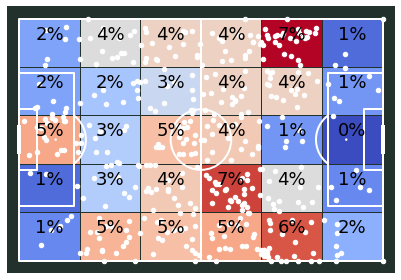

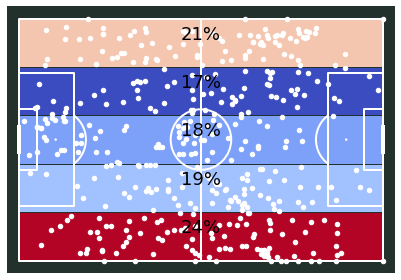

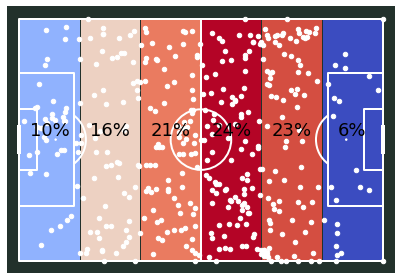

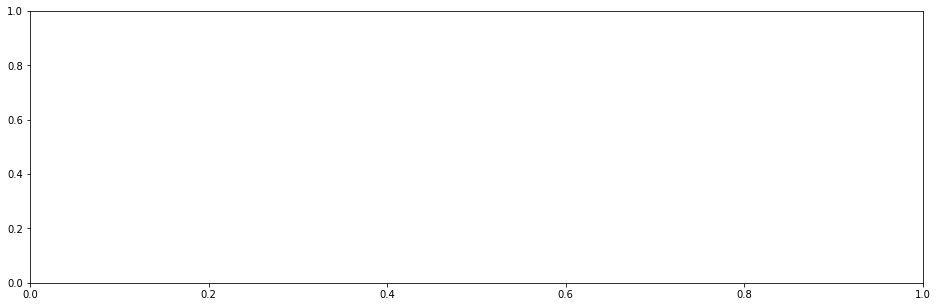

In [53]:
# Initialize the pitch object
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

# Create individual pitch plots using pitch.draw
pitch1, ax1 = pitch.draw()
pitch2, ax2 = pitch.draw()
pitch3, ax3 = pitch.draw()

# Define the bins
bins = [(6, 5), (1, 5), (6, 1)]

# Plot data for each bin
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(location_xy.x, location_xy.y, statistic='count', bins=bin)
    
    if i == 0:
        pitch.heatmap(bin_statistic, ax=ax1, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax1)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax1, ha='center', va='bottom')
    elif i == 1:
        pitch.heatmap(bin_statistic, ax=ax2, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax2)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax2, ha='center', va='bottom')
    elif i == 2:
        pitch.heatmap(bin_statistic, ax=ax3, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy.x, location_xy.y, c='white', s=20, ax=ax3)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax3, ha='center', va='bottom')

# Set the title for the overall figure
fig = plt.subplots(figsize=(16, 5))




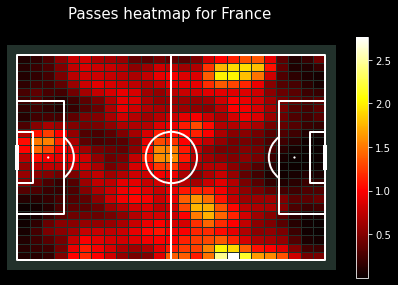

In [58]:
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter 
plt.style.use('dark_background')

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

fig,ax = pitch.draw()

bin_statistic=pitch.bin_statistic(location_xy.x,location_xy.y,statistic='count',bins=(25,25))
bin_statistic['statistic']=gaussian_filter(bin_statistic['statistic'],1)
pcm=pitch.heatmap(bin_statistic,ax=ax,cmap='hot',edgecolors='#22312b')
cbar=fig.colorbar(pcm,ax=ax)
title=fig.suptitle('Passes heatmap for France',x=0.4,y=0.98,fontsize=15)

In [59]:
df_englandpass=df.loc[(df['type_name']== 'Pass') & (df['team_name']== "England")]

location_xy_england = df_pass.location.apply(pd.Series)

location_xy_england.columns=['x', 'y']

In [60]:
location_xy_england.dropna(inplace = True)
location_xy_england.head(10)

,x,y
4,61.0,40.1
7,46.1,42.3
14,99.0,80.0
56,30.3,68.4
58,23.2,70.6
62,26.4,65.9
64,20.4,41.1
67,80.4,13.4
71,95.4,18.0
73,92.2,13.6


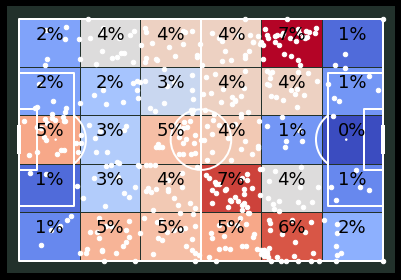

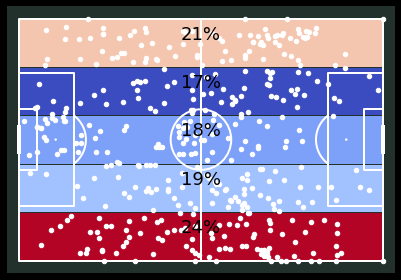

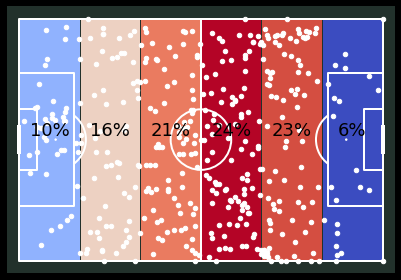

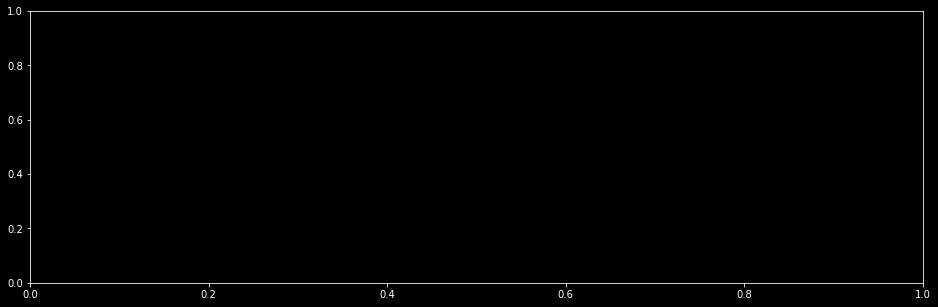

In [61]:
# Initialize the pitch object
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

# Create individual pitch plots using pitch.draw
pitch1, ax1 = pitch.draw()
pitch2, ax2 = pitch.draw()
pitch3, ax3 = pitch.draw()

# Define the bins
bins = [(6, 5), (1, 5), (6, 1)]

# Plot data for each bin
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(location_xy_england.x, location_xy_england.y, statistic='count', bins=bin)
    
    if i == 0:
        pitch.heatmap(bin_statistic, ax=ax1, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy_england.x, location_xy_england.y, c='white', s=20, ax=ax1)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax1, ha='center', va='bottom')
    elif i == 1:
        pitch.heatmap(bin_statistic, ax=ax2, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy_england.x, location_xy_england.y, c='white', s=20, ax=ax2)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax2, ha='center', va='bottom')
    elif i == 2:
        pitch.heatmap(bin_statistic, ax=ax3, cmap='coolwarm', edgecolors='#22312b')
        pitch.scatter(location_xy_england.x, location_xy_england.y, c='white', s=20, ax=ax3)
        bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                      .applymap(lambda x: '{:.0%}'.format(x))
                                      .values)
        pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax3, ha='center', va='bottom')

# Set the title for the overall figure
fig = plt.subplots(figsize=(16, 5))




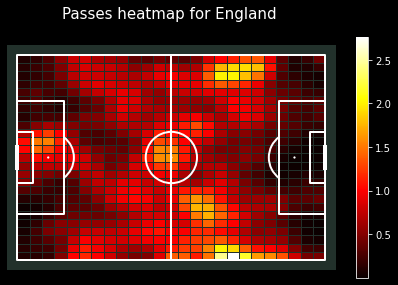

In [62]:
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter 
plt.style.use('dark_background')

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='white')

fig,ax = pitch.draw()

bin_statistic1=pitch.bin_statistic(location_xy_england.x,location_xy_england.y,statistic='count',bins=(25,25))
bin_statistic1['statistic']=gaussian_filter(bin_statistic1['statistic'],1)
pcm1=pitch.heatmap(bin_statistic1,ax=ax,cmap='hot',edgecolors='#22312b')
cbar=fig.colorbar(pcm1,ax=ax)
title=fig.suptitle('Passes heatmap for England',x=0.4,y=0.98,fontsize=15)